# First Adaptive Boosting


In [1]:
# Adaptive Boosting works by using an ensemble of weak-learners (weak-learners is one root and two leaf ) and then combining
#them through the use of weighted sum.

In [2]:
# Adaboost adapts by using previously created weak learners in order to adjust misclassified instances for 
# the next created weak learner.
#
# the weight of stump should change according to the performance.
# increase if error more
# decrease if error less

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
df =pd.read_csv('mushrooms.csv')
# this data set for mushrooms and has data for eatable and not-eatable(poison)

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

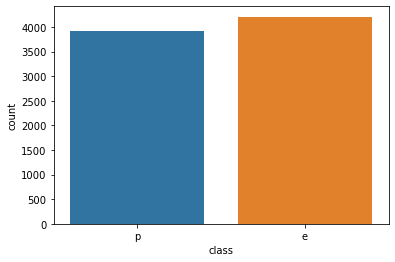

In [7]:
sns.countplot(data=df, x='class');

In [8]:
X=df.drop('class',axis=1)
y=df['class']

In [9]:
# X columns need to changed to dummy as decision tree needs ( and boosting algorithem is part of it)
X = pd.get_dummies(X , drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3 , random_state=101)

# importing Adaptive Boosting Model

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
len(X.columns)

95

In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Adaboost need value for (n_estimators) so the best way to figure it out 
accuracy = []
for n in range(1 , 96) : 
    ad_model = AdaBoostClassifier(n_estimators=n)
    ad_model.fit(X_train, y_train)
    pred = ad_model.predict(X_test)
    acc = 1 - accuracy_score(y_test,pred)
    accuracy.append(acc)
    

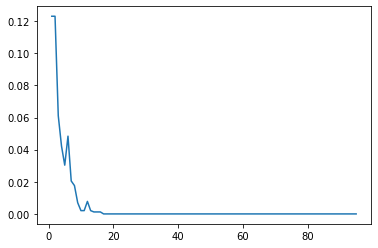

In [16]:
plt.plot(range(1,96),accuracy)

In [17]:
accuracy

[0.12305168170631664,
 0.12305168170631664,
 0.06111566858080397,
 0.04224774405250209,
 0.03035274815422473,
 0.048400328137817916,
 0.020508613617719496,
 0.017637407711238673,
 0.006972928630024633,
 0.002050861361771905,
 0.002050861361771905,
 0.007793273174733439,
 0.002050861361771905,
 0.0012305168170632097,
 0.0012305168170632097,
 0.0012305168170632097,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [18]:
# so at n = 17 the error rate = 0 
ad_model = AdaBoostClassifier(n_estimators=17)
ad_model.fit(X_train,y_train)
pred = ad_model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1274
           p       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [19]:
ad_model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05882353, 0.05882353, 0.05882353,
       0.        , 0.        , 0.11764706, 0.05882353, 0.        ,
       0.        , 0.        , 0.        , 0.11764706, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05882353, 0.        , 0.        , 0.        , 0.        ,
       0.05882353, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05882353, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Gradient Boosting 

In [20]:
# Just like AdaBoost, Gradient Boost also combines a no. of weak learners to form a strong learner.
# Here, the residual of the current classifier becomes the input for the next consecutive classifier on which the
# trees are built, and hence it is an additive model. 
# The residuals are captured in a step-by-step manner by the classifiers, in order to capture the maximum variance within the
# data, this is done by introducing the learning rate to the classifiers.

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
# It is good to use grid searc with it 
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[50,100],
           'learning_rate':[0.01,0.05,0.1],
           'max_depth':[3,4,5]}
# 'n_estimators':(default=100) The number of boosting stages to perform.
# Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
#
# 'learning_rate': ( default=0.1) Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off  
# between learning_rate and  n_estimators.
#
# max_depthint(default=3) The maximum depth of the individual regression estimators. 
# The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance;
# the best value depends on the interaction of the input variables.

In [23]:
gb_model = GradientBoostingClassifier()

In [24]:
grid = GridSearchCV(estimator = gb_model, param_grid=param_grid)
grid.fit(X_train,y_train)
pred = grid.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1274
           p       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [25]:
grid.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}